# Titanic Dataset Analysis



This analysis is conducted as part of the Udacity data analysis nanodegree. Given the choice between analyzing baseball statistics and Titanic passenger statistics, I chose the Titanic statistics. Given the nature of the data, the obvious question to try and answer is:

__What factors influenced whether or not a given passenger survived?__

In [1]:
#Some imports
import numpy
import pandas as pd
import matplotlib

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Data Cleaning

In [2]:
titanic_data_full = pd.read_csv('titanic-data.csv')
titanic_data_full.set_index('PassengerId', inplace = True)

titanic_data_full.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looking at the output of head, the top five rows of the table, we can see the columns in the dataset. From the [Kaggle documentation](https://www.kaggle.com/c/titanic/data) of the data:

* Survived can have values of 0 for did not survive and 1 for survived
* Pclass can be 1, 2, or 3 which is a proxy for economic status. One is upper class, two is middle class, and three is lower class.

With these parameters in mind, there are three variables over which survival can easily be analyzed:
1. Age
2. Economic Status
3. Gender

First we will look at some basic statistics of the data, to see if there are any issues.

In [3]:
titanic_data_full.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
# Define a varible to use for bin creation for a variety of functions
by_ten = [x*10 for x in range(9)]

titanic_age_wna = titanic_data_full[["Survived", "Age"]]
titanic_age = titanic_age_wna.dropna()

# initially was getting a lot of 'savewithcopy' warnings by doing titanic_age['AgeRange'] =... 
# the assign function helps to mitigate this
# See the documentation or stack overflow
titanic_age = titanic_age.assign(AgeRange = pd.cut(titanic_age['Age'], bins = by_ten).values)

titanic_age.head()

,Survived,Age,AgeRange
PassengerId,,,
1,0,22.0,"(20, 30]"
2,1,38.0,"(30, 40]"
3,1,26.0,"(20, 30]"
4,1,35.0,"(30, 40]"
5,0,35.0,"(30, 40]"


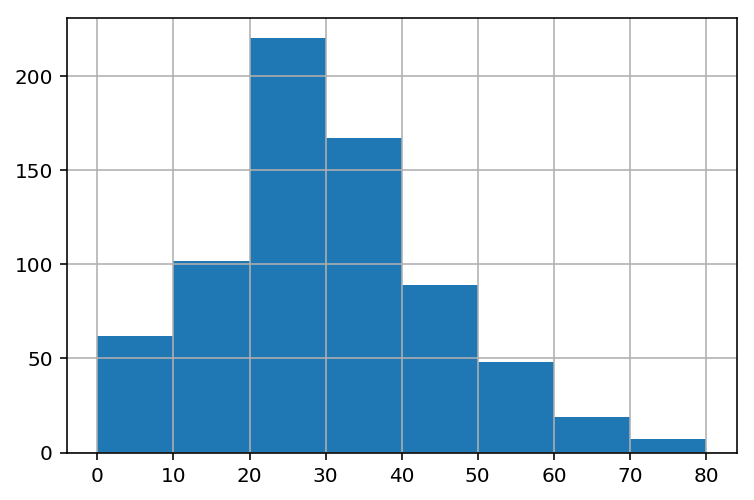

In [5]:
titanic_age['Age'].hist(bins = by_ten)

In [60]:
survival_by_age = titanic_age.groupby(titanic_age['AgeRange'])['Survived'].agg(['count', 'mean'])
survival_by_age

,count,mean
AgeRange,,
"(0, 10]",64,0.593750
"(10, 20]",115,0.382609
"(20, 30]",230,0.365217
"(30, 40]",155,0.445161
"(40, 50]",86,0.383721
"(50, 60]",42,0.404762
"(60, 70]",17,0.235294
"(70, 80]",5,0.200000


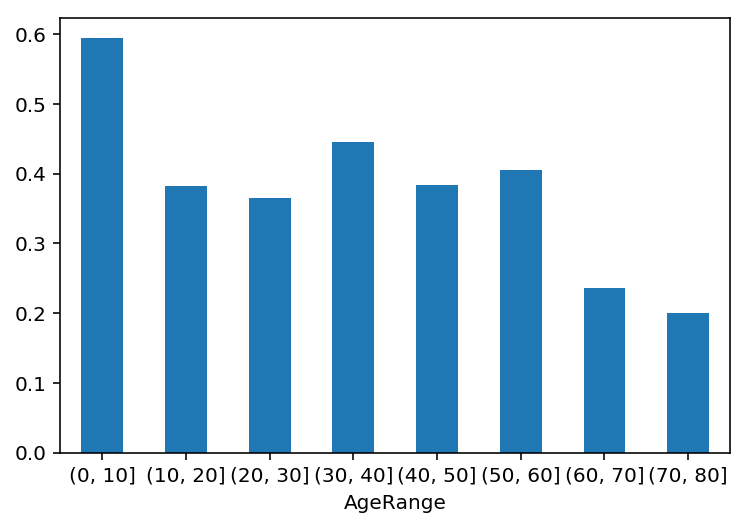

In [7]:
survival_by_age.plot(kind = 'bar', rot = 0)

Sources

https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas

In [63]:
titanic_data_full.groupby(titanic_data_full['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [64]:
titanic_data_full.groupby(titanic_data_full['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64